# Developing a Promotional Algorithm


## Objectives:
- 1. Analyze the data and see the differnt variables that can affect an employees promotion
- 2. Build a predictive model to determine the employees that are likely to be promoted

## Exploratory Data Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print('All libraries imported')

All libraries imported


### Loading the Dataset

In [3]:
dataset = pd.read_csv('dataset.csv')
dataset.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0


In [5]:
dataset.columns

Index(['EmployeeNo', 'Division', 'Qualification', 'Gender',
       'Channel_of_Recruitment', 'Trainings_Attended', 'Year_of_birth',
       'Last_performance_score', 'Year_of_recruitment', 'Targets_met',
       'Previous_Award', 'Training_score_average', 'State_Of_Origin',
       'Foreign_schooled', 'Marital_Status', 'Past_Disciplinary_Action',
       'Previous_IntraDepartmental_Movement', 'No_of_previous_employers',
       'Promoted_or_Not'],
      dtype='object')

In [6]:
#data size
dataset.shape

(38312, 19)

In [7]:
dataset.isnull().sum()

EmployeeNo                                0
Division                                  0
Qualification                          1679
Gender                                    0
Channel_of_Recruitment                    0
Trainings_Attended                        0
Year_of_birth                             0
Last_performance_score                    0
Year_of_recruitment                       0
Targets_met                               0
Previous_Award                            0
Training_score_average                    0
State_Of_Origin                           0
Foreign_schooled                          0
Marital_Status                            0
Past_Disciplinary_Action                  0
Previous_IntraDepartmental_Movement       0
No_of_previous_employers                  0
Promoted_or_Not                           0
dtype: int64

In [8]:
dataset.Qualification.value_counts()

First Degree or HND         25578
MSc, MBA and PhD            10469
Non-University Education      586
Name: Qualification, dtype: int64

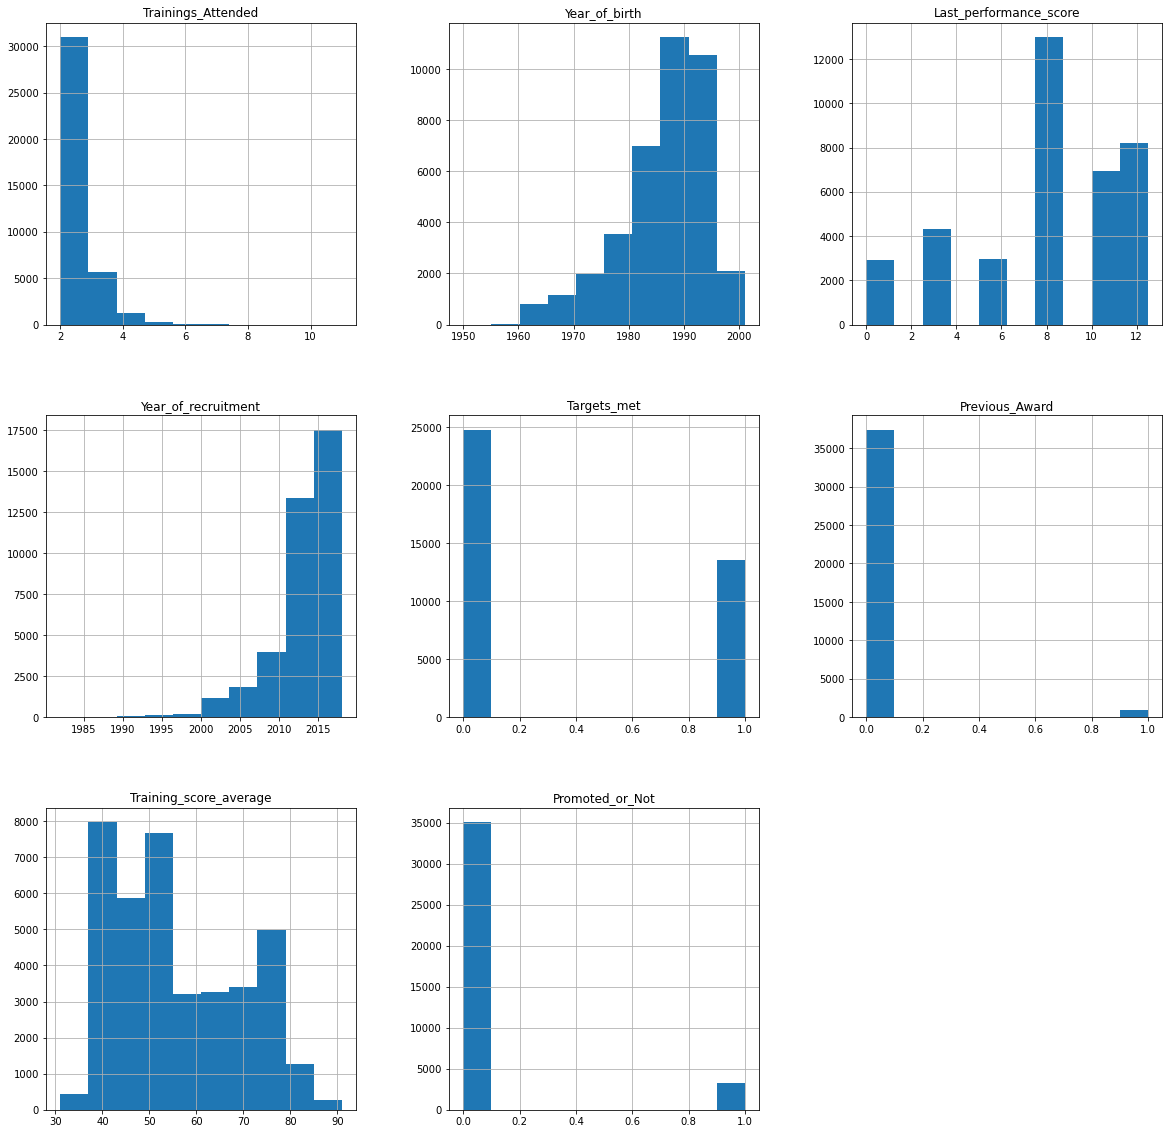

In [9]:
dataset.hist(figsize=(20,20))
plt.show()

C:\Users\Dell latitude 5470\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


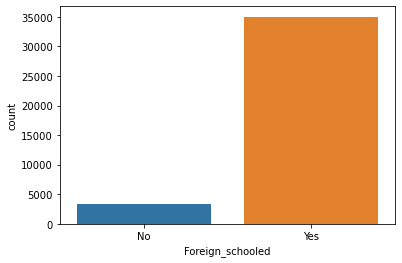

In [10]:
sns.countplot('Foreign_schooled',data = dataset)
plt.show()

In [12]:
dataset.Foreign_schooled.value_counts()

Yes    34995
No      3317
Name: Foreign_schooled, dtype: int64

C:\Users\Dell latitude 5470\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


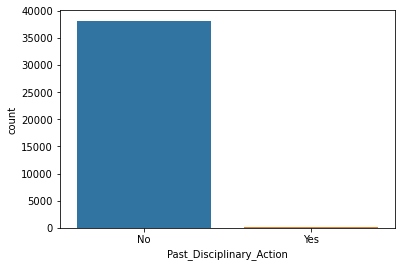

In [13]:
sns.countplot('Past_Disciplinary_Action',data=dataset)
plt.show()

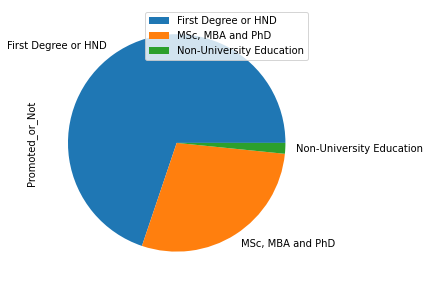

In [14]:
df_qualification = dataset.groupby(['Qualification']).count()[['Promoted_or_Not']]
df_qualification.head()
df_qualification.plot.pie(y='Promoted_or_Not', figsize=(5, 5))
plt.legend(loc = 0)
plt.show()

In [15]:
print("Percentage of Promoted Employees is {:.1f}% and non-promoted employees is: {:.1f}%".format(
 dataset[dataset['Promoted_or_Not'] == 1].shape[0] / dataset.shape[0]*100,
 dataset[dataset['Promoted_or_Not'] == 0].shape[0] / dataset.shape[0]*100))

Percentage of Promoted Employees is 8.5% and non-promoted employees is: 91.5%


In [16]:
dataset.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0


In [17]:
# Encoading the categorical variables
from sklearn import preprocessing
#creating label encoader
le = preprocessing.LabelEncoder()

In [18]:
#converting string lables into numbers
dataset['Marital_Status']=le.fit_transform(dataset['Foreign_schooled'])
dataset['Foreign_schooled']=le.fit_transform(dataset['Foreign_schooled'])
dataset['Past_Disciplinary_Action']=le.fit_transform(dataset['Past_Disciplinary_Action'])
dataset['Previous_IntraDepartmental_Movement']=le.fit_transform(dataset['Previous_IntraDepartmental_Movement'])
dataset['No_of_previous_employers']=le.fit_transform(dataset['No_of_previous_employers'])
dataset['Division']=le.fit_transform(dataset['Division'])
dataset['Gender']=le.fit_transform(dataset['Gender'])
dataset['Channel_of_Recruitment']=le.fit_transform(dataset['Channel_of_Recruitment'])
dataset['State_Of_Origin']=le.fit_transform(dataset['State_Of_Origin'])

In [19]:
dataset.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,1,"MSc, MBA and PhD",0,1,2,1986,12.5,2011,1,0,41,3,0,0,0,0,0,0
1,YAK/S/00002,2,First Degree or HND,1,0,2,1991,12.5,2015,0,0,52,3,1,1,0,0,0,0
2,YAK/S/00003,1,First Degree or HND,1,1,2,1987,7.5,2012,0,0,42,20,1,1,0,0,0,0
3,YAK/S/00004,1,First Degree or HND,1,0,3,1982,2.5,2009,0,0,42,26,1,1,0,0,1,0
4,YAK/S/00006,4,First Degree or HND,1,1,3,1990,7.5,2012,0,0,77,2,1,1,0,0,1,0


In [20]:
dataset.drop('Qualification', axis=1, inplace=True)

In [21]:
dataset.head()

,EmployeeNo,Division,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,1,0,1,2,1986,12.5,2011,1,0,41,3,0,0,0,0,0,0
1,YAK/S/00002,2,1,0,2,1991,12.5,2015,0,0,52,3,1,1,0,0,0,0
2,YAK/S/00003,1,1,1,2,1987,7.5,2012,0,0,42,20,1,1,0,0,0,0
3,YAK/S/00004,1,1,0,3,1982,2.5,2009,0,0,42,26,1,1,0,0,1,0
4,YAK/S/00006,4,1,1,3,1990,7.5,2012,0,0,77,2,1,1,0,0,1,0


In [22]:
dataset.corr()

,Division,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
Division,1.000000,-0.107572,-0.003205,0.022635,-0.016845,0.027623,-0.004005,0.043780,0.004503,0.487098,-0.000955,-0.003430,-0.003430,-0.004048,0.004342,0.000813,0.015582
Gender,-0.107572,1.000000,0.008076,0.084906,0.012095,-0.023586,0.017644,-0.038382,0.001773,-0.024311,-0.002833,0.016073,0.016073,0.012799,-0.002715,0.004717,-0.010437
Channel_of_Recruitment,-0.003205,0.008076,1.000000,-0.011279,0.031744,0.025190,0.019725,0.019151,-0.003005,0.009362,0.001632,-0.002931,-0.002931,-0.003240,-0.003799,0.000612,0.006324
Trainings_Attended,0.022635,0.084906,-0.011279,1.000000,0.078710,-0.062042,0.056215,-0.044789,-0.007409,0.041065,0.010643,-0.005108,-0.005108,-0.002260,-0.005871,0.000796,-0.024345
Year_of_birth,-0.016845,0.012095,0.031744,0.078710,1.000000,-0.175572,0.654666,0.025337,0.013627,0.048390,0.000531,-0.001877,-0.001877,-0.000251,0.011412,-0.003117,0.017991
Last_performance_score,0.027623,-0.023586,0.025190,-0.062042,-0.175572,1.000000,-0.190333,0.276350,0.026587,0.057836,0.000386,-0.001923,-0.001923,-0.003065,-0.005478,-0.005428,0.119690
Year_of_recruitment,-0.004005,0.017644,0.019725,0.056215,0.654666,-0.190333,1.000000,0.076910,0.041995,0.037477,0.003785,-0.000253,-0.000253,0.003217,0.004988,-0.003550,0.012287
Targets_met,0.043780,-0.038382,0.019151,-0.044789,0.025337,0.276350,0.076910,1.000000,0.092934,0.077201,0.000604,-0.004294,-0.004294,-0.000264,-0.002965,-0.003308,0.224518
Previous_Award,0.004503,0.001773,-0.003005,-0.007409,0.013627,0.026587,0.041995,0.092934,1.000000,0.072360,0.001590,0.002960,0.002960,-0.001374,-0.009762,0.003887,0.201434
Training_score_average,0.487098,-0.024311,0.009362,0.041065,0.048390,0.057836,0.037477,0.077201,0.072360,1.000000,-0.004252,0.000796,0.000796,-0.006620,-0.000237,0.008194,0.178448


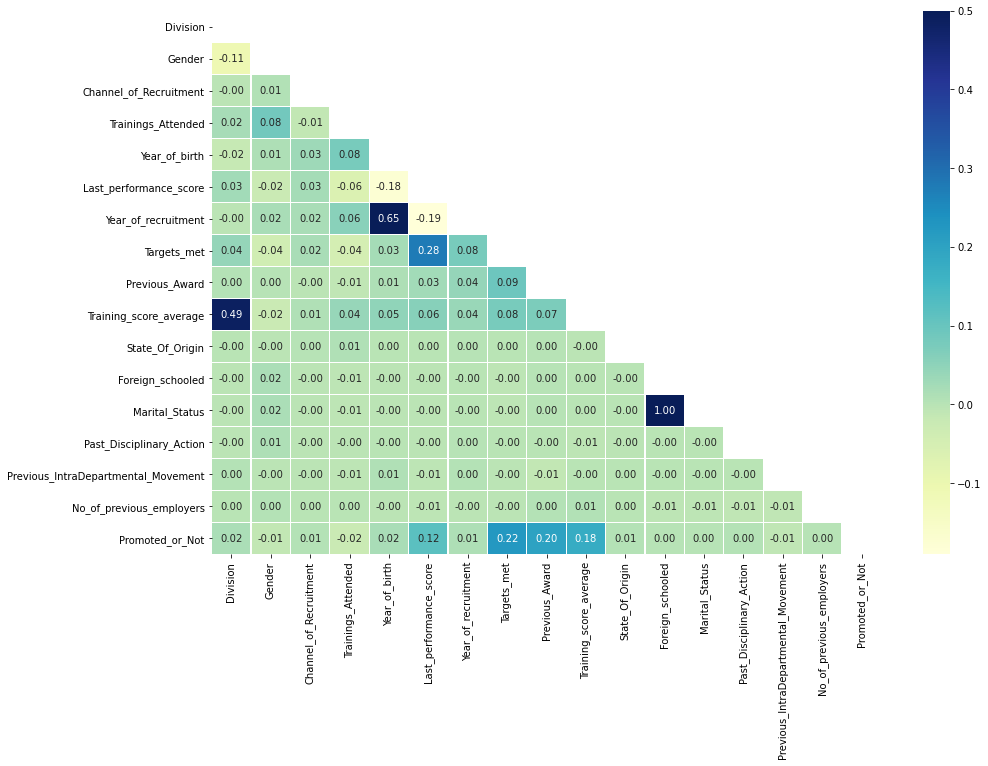

In [23]:
# Calculate correlations
corr = dataset.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
 vmax=.5,
 mask=mask,
 annot=True, fmt='.2f',
 linewidths=.2, cmap="YlGnBu")
plt.show()

In [24]:
# Find correlations with the target and sort
correlations = dataset.corr()['Promoted_or_Not'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 Last_performance_score    0.119690
Training_score_average    0.178448
Previous_Award            0.201434
Targets_met               0.224518
Promoted_or_Not           1.000000
Name: Promoted_or_Not, dtype: float64

Most Negative Correlations: 
 Trainings_Attended                    -0.024345
Gender                                -0.010437
Previous_IntraDepartmental_Movement   -0.008289
No_of_previous_employers               0.001690
Foreign_schooled                       0.003202
Name: Promoted_or_Not, dtype: float64


In [25]:
features = dataset[['Division', 'Gender','Channel_of_Recruitment', 'Trainings_Attended', 'Year_of_birth',
 'Last_performance_score', 'Year_of_recruitment', 'Targets_met',
 'Previous_Award', 'Training_score_average', 'State_Of_Origin',
 'Foreign_schooled', 'Marital_Status', 'Past_Disciplinary_Action',
 'Previous_IntraDepartmental_Movement', 'No_of_previous_employers']]
target = dataset['Promoted_or_Not']

[0.10466105 0.0163367  0.03381698 0.02816633 0.12272998 0.05681896
 0.10187337 0.04915329 0.03967409 0.23271056 0.127247   0.00477673
 0.00476823 0.00156405 0.01145686 0.06424582]


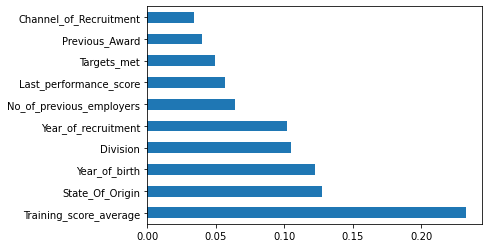

In [26]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(features,target)
print(model.feature_importances_)
feat_importance = pd.Series(model.feature_importances_,index=features.columns)
feat_importance.nlargest(10).plot(kind = 'barh')
plt.show()

In [27]:
target = dataset['Promoted_or_Not']
features = dataset[['Training_score_average','Last_performance_score','Division']]

In [29]:
#Splitting the dataset
from sklearn.model_selection import train_test_split

In [30]:
features_train,features_test,target_train,target_test = train_test_split(features,target, test_size = 0.2, random_state = 0)

In [31]:
features_train

,Training_score_average,Last_performance_score,Division
14599,52,12.5,6
4,77,7.5,4
28190,66,10.0,8
10683,69,7.5,3
10970,72,2.5,8
...,...,...,...
20757,63,2.5,8
32103,58,12.5,2
30403,44,0.0,1
21243,41,7.5,1


In [32]:
#Fitting the Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [33]:
clasifier = DecisionTreeClassifier()
model = clasifier.fit(features_train, target_train)

In [34]:
DecisionTreeClassifier?

In [35]:
#Prediction
target_pred = model.predict(features_test)

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [37]:
accuracy_score(target_test,target_pred)

0.9464961503327678

In [38]:
print(confusion_matrix(target_test,target_pred))

[[7000    7]
 [ 403  253]]


In [39]:
print(classification_report(target_test,target_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      7007
           1       0.97      0.39      0.55       656

    accuracy                           0.95      7663
   macro avg       0.96      0.69      0.76      7663
weighted avg       0.95      0.95      0.94      7663



In [40]:
from sklearn.linear_model import LogisticRegression
clasifier = LogisticRegression()
model = clasifier.fit(features_train, target_train)

In [41]:
target_pred = model.predict(features_test)
accuracy_score(target_test, target_pred)

0.9147853321153595

In [42]:
print(confusion_matrix(target_test,target_pred))

[[7007    0]
 [ 653    3]]
